In [18]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data =pd.read_csv("data_logistic_regression.csv",names=["Exam1","Exam2","Admitted"])
data.shape


(100, 3)

In [19]:
data.describe()


,Exam1,Exam2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [20]:
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [21]:
Positive=data[data["Admitted"].isin([1])]
Positive

,Exam1,Exam2,Admitted
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1
12,82.307053,76.481963,1
13,69.364589,97.718692,1
15,53.971052,89.207350,1
16,69.070144,52.740470,1


In [22]:
Negative=data[data["Admitted"].isin([0])]
Negative

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
5,45.083277,56.316372,0
10,95.861555,38.225278,0
11,75.013658,30.603263,0
14,39.538339,76.036811,0
17,67.946855,46.678574,0
20,67.372028,42.838438,0
22,50.534788,48.855812,0


Text(0, 0.5, 'Exam2')

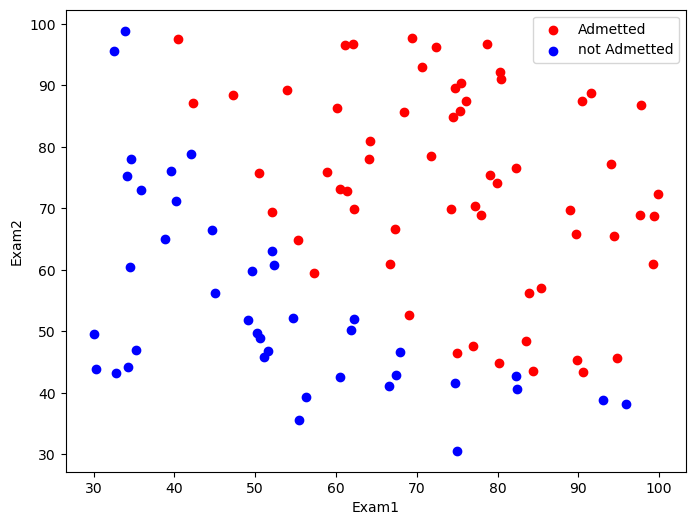

In [23]:
fig ,ax=plt.subplots(figsize=(8,6))

ax.scatter(Positive["Exam1"],Positive["Exam2"],c='r',label="Admetted")
ax.scatter(Negative["Exam1"],Negative["Exam2"],c='b',label="not Admetted")
ax.legend()
ax.set_xlabel("Exam1")
ax.set_ylabel("Exam2")

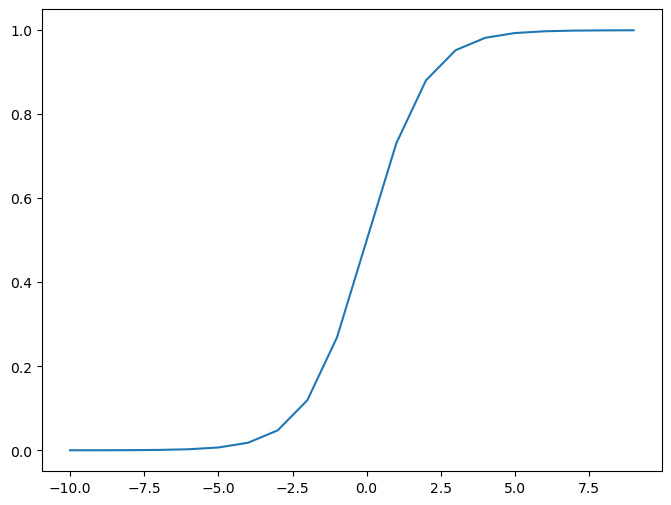

In [24]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

nums=np.arange(-10,10,step=1)

fig ,ax=plt.subplots(figsize=(8,6))

ax.plot(nums,sigmoid(nums))

In [25]:
data.insert(0,'ones',1)
data

,ones,Exam1,Exam2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1
...,...,...,...,...
95,1,83.489163,48.380286,1
96,1,42.261701,87.103851,1
97,1,99.315009,68.775409,1
98,1,55.340018,64.931938,1


In [26]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]


In [27]:
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [28]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

cost(theta,X,y)




0.6931471805599453

In [29]:
def gradient(theta, X, Y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    Y = np.matrix(Y)
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    error = sigmoid(X * theta.T) - Y
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    return grad
import scipy.optimize as opt
result=opt.fmin_tnc(func=cost,x0=theta,fprime=gradient,args=(X,y))
result



(array([-25.16131856,   0.20623159,   0.20147149]), 36, 0)

In [30]:
theta_min=np.matrix(result[0])
cost(theta_min,X,y)

0.20349770158947486

In [31]:
def predict(theta,X):
    probability=sigmoid(X*theta.T)
    return [1 if x>=0.5 else 0 for x in probability]

y_pred=predict(theta_min,X)
y_pred

[0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1]

In [32]:
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in
zip(y_pred, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))




accuracy = 89%


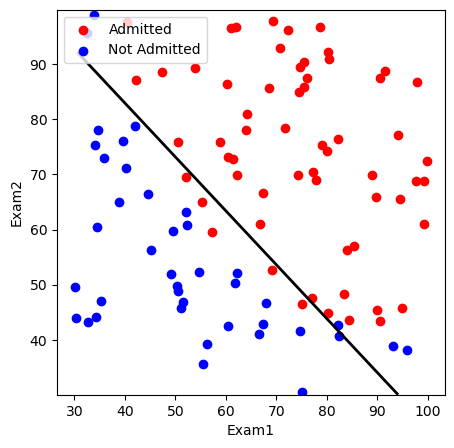

In [33]:

# Create a mesh grid
u = np.linspace(X[:, 2].min(), X[:, 2].max(), 100)
v = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
z = np.zeros((len(u), len(v)))

# Evaluate z = theta_min[0,0] + theta_min[0,1]*u + theta_min[0,2]*v
for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = theta_min[0, 0] + theta_min[0, 2] * u[i] + theta_min[0, 1] * v[j]

# Transpose z before calling contour
z = z.T

# Plotting
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(Positive["Exam1"], Positive["Exam2"], c='r', label="Admitted")
ax.scatter(Negative["Exam1"], Negative["Exam2"], c='b', label="Not Admitted")
ax.contour(u, v, z, levels=[0], linewidths=2, colors='k')  # Plot decision boundary
ax.legend(loc=2)
ax.set_xlabel('Exam1')
ax.set_ylabel('Exam2')
plt.show()

# Classification with Regularization

In [34]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data =pd.read_csv("data_logistic_regression2.csv",names=["Exam1","Exam2","Admitted"])
data.shape


(96, 3)

In [35]:
Positive=data[data["Admitted"].isin([1])]
Positive

,Exam1,Exam2,Admitted
0,-0.593890,0.005117,1
1,-0.421080,-0.272660,1
2,-0.115780,-0.396930,1
3,0.201040,-0.601610,1
4,0.466010,-0.535820,1
5,0.673390,-0.535820,1
6,-0.138820,0.546050,1
7,-0.294350,0.779970,1
8,-0.265550,0.962720,1
9,-0.161870,0.801900,1


In [36]:
Negative=data[data["Admitted"].isin([0])]
Negative

,Exam1,Exam2,Admitted
36,0.183760,0.933480,0
37,0.224080,0.779970,0
38,0.298960,0.619150,0
39,0.506340,0.758040,0
40,0.615780,0.728800,0
41,0.604260,0.597220,0
42,0.765550,0.502190,0
43,0.926840,0.363300,0
44,0.823160,0.275580,0
45,0.961410,0.085526,0


Text(0, 0.5, 'Exam2')

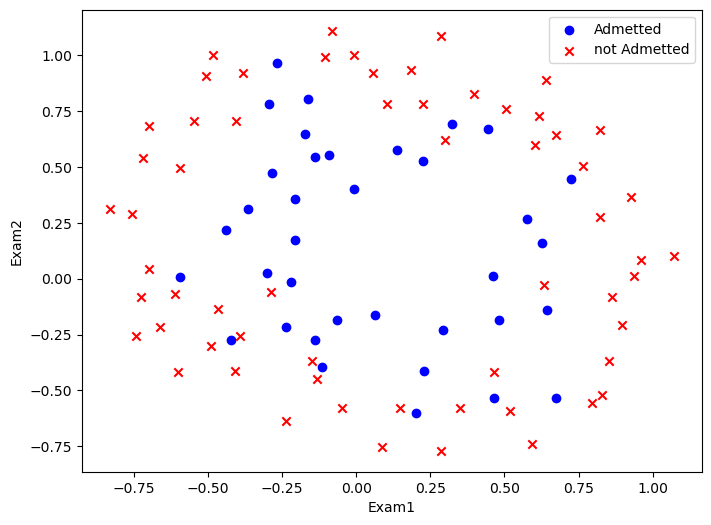

In [37]:
fig ,ax=plt.subplots(figsize=(8,6))

ax.scatter(Positive["Exam1"],Positive["Exam2"],c='b',label="Admetted")
ax.scatter(Negative["Exam1"],Negative["Exam2"],c='r',marker='x',label="not Admetted")
ax.legend()
ax.set_xlabel("Exam1")
ax.set_ylabel("Exam2")

In [38]:
X1=data["Exam1"]
X2=data["Exam2"]
data.insert(3,"Ones",1)

for i in range(1,6):
    for j in range(0,i):
        data['F'+str(i)+str(j)]=np.power(X1,i-j)*np.power(X2,j)

data.drop("Exam1",axis=1,inplace=True)
data.drop("Exam2",axis=1,inplace=True)
data.head()


,Admitted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43,F50,F51,F52,F53,F54
0,1,1,-0.59389,0.352705,-0.003039,-0.209468,0.001805,-0.000016,0.124401,-0.001072,0.000009,-7.957053e-08,-0.073881,0.000637,-0.000005,4.725614e-08,-4.071624e-10
1,1,1,-0.42108,0.177308,0.114812,-0.074661,-0.048345,-0.031305,0.031438,0.020357,0.013182,8.535499e-03,-0.013238,-0.008572,-0.005551,-3.594128e-03,-2.327289e-03
2,1,1,-0.11578,0.013405,0.045957,-0.001552,-0.005321,-0.018242,0.000180,0.000616,0.002112,7.240613e-03,-0.000021,-0.000071,-0.000245,-8.383181e-04,-2.874016e-03
3,1,1,0.20104,0.040417,-0.120948,0.008125,-0.024315,0.072763,0.001634,-0.004888,0.014628,-4.377515e-02,0.000328,-0.000983,0.002941,-8.800556e-03,2.633557e-02
4,1,1,0.46601,0.217165,-0.249697,0.101201,-0.116362,0.133793,0.047161,-0.054226,0.062349,-7.168891e-02,0.021977,-0.025270,0.029055,-3.340775e-02,3.841235e-02


In [39]:
cols = data.shape[1]
X = data.iloc[:,1:cols]
y = data.iloc[:,0:1]
x=np.array(X.values)
y=np.array(y.values)
theta=np.zeros(x.shape[1])



In [40]:
def costReg(theta,x,y ,learning_rate):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(x * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(x * theta.T)))
    reg = (learning_rate / 2 * len(x)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(x)) + reg

lr=.00001
costReg(theta,x,y,lr)



0.6931471805599453

In [41]:
import scipy.optimize as opt
result=opt.fmin_tnc(func=cost,x0=theta,fprime=gradient,args=(x,y))
theta_min=np.matrix(result[0])
cost(theta_min,X,y)


0.3679576746442048

In [42]:
y_pred=predict(theta_min,x)
y_pred

[1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1]

In [43]:
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in
zip(y_pred, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))




accuracy = 75%


# Multiclassification  (OVA  vs  AVA)

In [44]:
from scipy.io import loadmat
import numpy as np
data = loadmat('data_multiclassification.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [45]:
X=data['X']
Y=data['y']

print(X.shape)
print(Y.shape)

classes=np.unique(Y)
print(classes)
theta=np.zeros(X.shape[1]+1)
x=np.insert(X,0,1,axis=1)
x

(5000, 400)
(5000, 1)
[ 1  2  3  4  5  6  7  8  9 10]


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [46]:
all_theta=np.zeros((len(classes),X.shape[1]+1))
y_0=np.array([1 if label==0 else 0 for label in Y])
y_0=np.matrix(y_0).T
y_0

matrix([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]])

In [58]:
from scipy.optimize import minimize
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def costReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    m = len(y)

    h = sigmoid(X * theta.T)
    J = (-1 / m) * (y.T * np.log(h) + (1 - y).T * np.log(1 - h)) + (learningRate / (2 * m)) * np.sum(np.power(theta[:,1:], 2))

    return J

def gradient(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    parameters = int(theta.ravel().shape[1])
    error = sigmoid(X * theta.T) - y
    grad = ((X.T * error) / len(X)).T + ((learningRate / len(X)) * theta)
    # intercept gradient is not regularized
    grad[0, 0] = np.sum(np.multiply(error, X[:,0])) / len(X)
    return np.array(grad).ravel()

def one_vs_all(x, y, numlabel, learningrate):
    rows = x.shape[0]
    params = x.shape[1]

    all_theta = np.zeros((numlabel, params))

    for i in range(1, numlabel + 1):
        theta = np.zeros(params)
        y_i = np.array([1 if label == i else 0 for label in y])
        y_i = np.matrix(y_i).T
        fmin = minimize(fun=costReg, x0=theta, jac=gradient, args=(x, y_i, learningrate), method='TNC')
        all_theta[i - 1, :] = fmin.x

    return all_theta

all_theta = one_vs_all(x, Y, 10, 1)


In [59]:
all_theta

array([[-2.38324538e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.30434369e-03, -7.33960767e-10,  0.00000000e+00],
       [-3.18268717e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.45780284e-03, -5.08248901e-04,  0.00000000e+00],
       [-4.79683983e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.87302217e-05, -2.47809169e-07,  0.00000000e+00],
       ...,
       [-7.98799955e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.93510869e-05,  7.20587665e-06,  0.00000000e+00],
       [-4.57032567e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.33788603e-03,  1.00049474e-04,  0.00000000e+00],
       [-5.40342695e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.16444390e-04,  7.86245934e-06,  0.00000000e+00]])

In [61]:
def predict_all(X, all_theta):
    rows = X.shape[0]
    params = X.shape[1]
    num_labels = all_theta.shape[0]
    X = np.insert(X, 0, values=np.ones(rows), axis=1)
    X = np.matrix(X)
    all_theta = np.matrix(all_theta)
    h = sigmoid(X * all_theta.T)
    h_argmax = np.argmax(h, axis=1)

    h_argmax = h_argmax + 1
    return h_argmax

y_pred = predict_all(X, all_theta)
correct = [1 if a == b else 0 for (a, b) in zip(y_pred, Y)]
accuracy = (sum(map(int, correct)) / float(len(correct)))
print ('accuracy = {0}%'.format(accuracy * 100))





accuracy = 94.46%


In [62]:
y_pred

matrix([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 7]], dtype=int64)

# Classification in sklearn 

1. linear_model.logisticRegressoin 
2. Linear_model .SGDClassifier


**Atrributes** 
1. coef_
2. intercept_
3. classes_
4. n_iter_

**methodes**
1. fit(x,y)
2. predect(x)
3. score(x,y)


In [78]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = load_breast_cancer()
X=data.data
Y=data.target
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=0)


In [65]:

model=LogisticRegression(penalty='l2',C=1.0,solver='liblinear',random_state=33) #liblinear is used for small dataset

model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)


In [73]:
print(model.score(X_test,Y_test))
print(model.score(X_train,Y_train))
print(model.intercept_)
print(model.coef_)
print(model.get_params())


0.9627659574468085
0.958005249343832
[0.3432525]
[[ 1.69133138  0.10181984  0.08911301 -0.0064007  -0.10915884 -0.31994692
  -0.48205004 -0.2399495  -0.21431837 -0.02090434  0.05760182  0.95993836
   0.19815798 -0.11189187 -0.00705136 -0.00780866 -0.05430021 -0.02813447
  -0.03075471  0.00481041  1.51625785 -0.28129019 -0.27674207 -0.01861836
  -0.18796298 -0.97713269 -1.42198455 -0.4960268  -0.54187782 -0.10396605]]
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 33, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [71]:
print("Classification Report:",classification_report(Y_test,Y_pred))


Classification Report:               precision    recall  f1-score   support

           0       0.92      0.99      0.95        67
           1       0.99      0.95      0.97       121

    accuracy                           0.96       188
   macro avg       0.95      0.97      0.96       188
weighted avg       0.96      0.96      0.96       188



In [74]:
model.classes_

array([0, 1])

Text(70.72222222222221, 0.5, 'Actual')

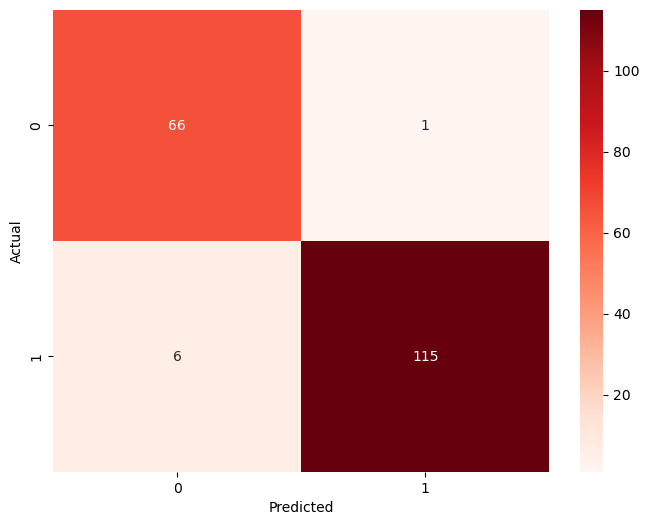

In [85]:
import seaborn as sns
cf=confusion_matrix(Y_test,Y_pred)
fig,ax=plt.subplots(figsize=(8,6))
sns.heatmap(cf, annot=True, fmt='d', cmap='Reds')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
